### Dataset link
### https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

##### The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
##### variables obtained :
##### Gender, Age, Height and Weight.

##### NObesity values are:

##### •Underweight Less than 18.5
##### •Normal 18.5 to 24.9
##### •Overweight 25.0 to 29.9
##### •Obesity I 30.0 to 34.9
##### •Obesity II 35.0 to 39.9
##### •Obesity III Higher than 40

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
path = '../data/ObesityDataSet.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

### lower the feature names

In [5]:
 df.columns = [ col.lower() for col in df.columns ]

df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df['nobeyesdad'].value_counts()

nobeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### convert the target feature values into 2-values yes(obesity) no(no obesity)

In [7]:
def convert_target(value):
    if( value == 'Obesity_Type_I' or  value == 'Obesity_Type_II' or value == 'Obesity_Type_III'):
        return 'yes'
    return 'no'

In [8]:
df['target'] = df['nobeyesdad'].apply(convert_target)

In [9]:
# columns to drop from dataset
drop_cols = ['nobeyesdad']

In [10]:
df.isnull().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
target                            0
dtype: int64

### no null values in dataset

In [11]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,no


# Explore the categorical columns

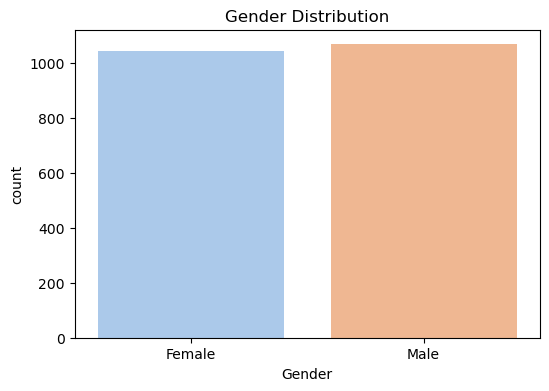

In [12]:
plt.figure( figsize=(6,4) )
plt.title('Gender Distribution')
sns.countplot(data=df , x='gender',palette='pastel')
plt.xlabel('Gender')

plt.show()

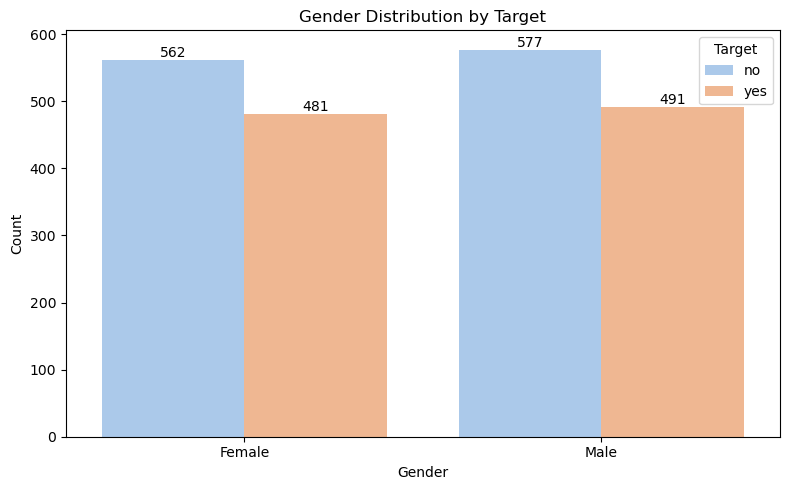

In [13]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='gender', hue='target', palette='pastel')

plt.title('Gender Distribution by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Family history of over weight
##### family member suffered or suffers from overweight

In [14]:
df['family_history_with_overweight'].isnull().sum()

0

In [15]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

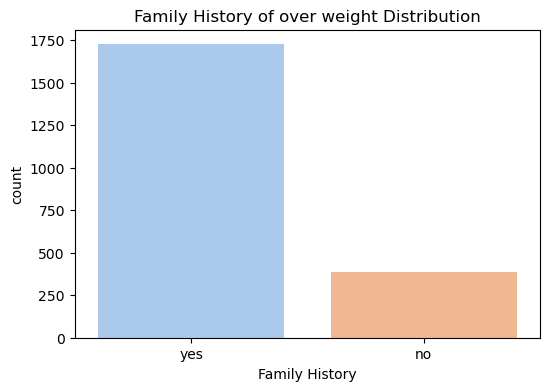

In [16]:
plt.figure( figsize=(6,4) )
plt.title('Family History of over weight Distribution')
sns.countplot(data=df , x='family_history_with_overweight',palette='pastel')
plt.xlabel('Family History')

plt.show()

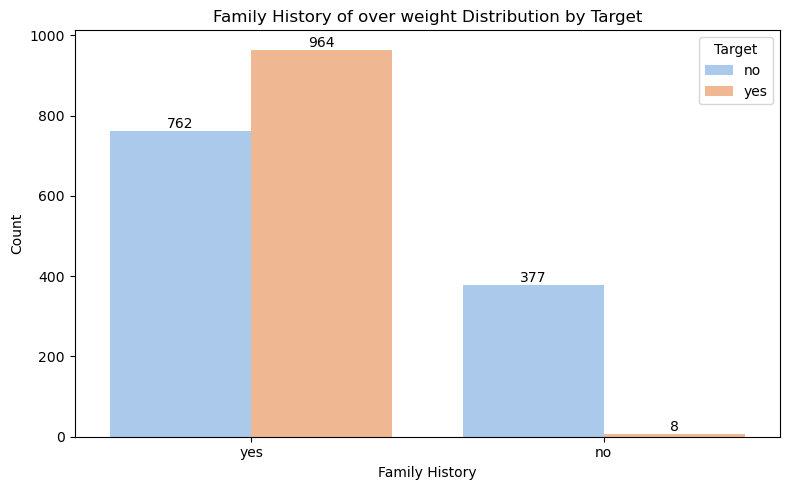

In [17]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='family_history_with_overweight', hue='target', palette='pastel')

plt.title('Family History of over weight Distribution by Target')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### FAVC
#### Frequent consumption of high caloric food

In [18]:
df['favc'].isnull().sum()

0

In [19]:
df['favc'].value_counts()

favc
yes    1866
no      245
Name: count, dtype: int64

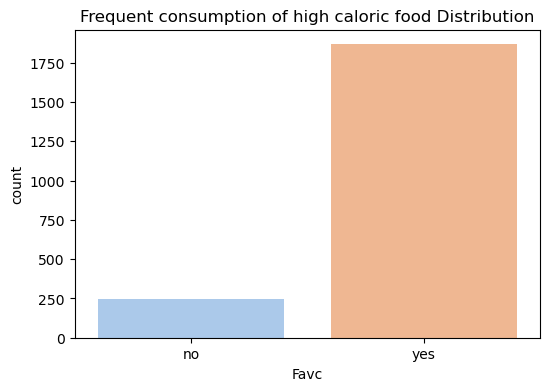

In [20]:
plt.figure( figsize=(6,4) )
plt.title('Frequent consumption of high caloric food Distribution')
sns.countplot(data=df , x='favc',palette='pastel')
plt.xlabel('Favc')

plt.show()

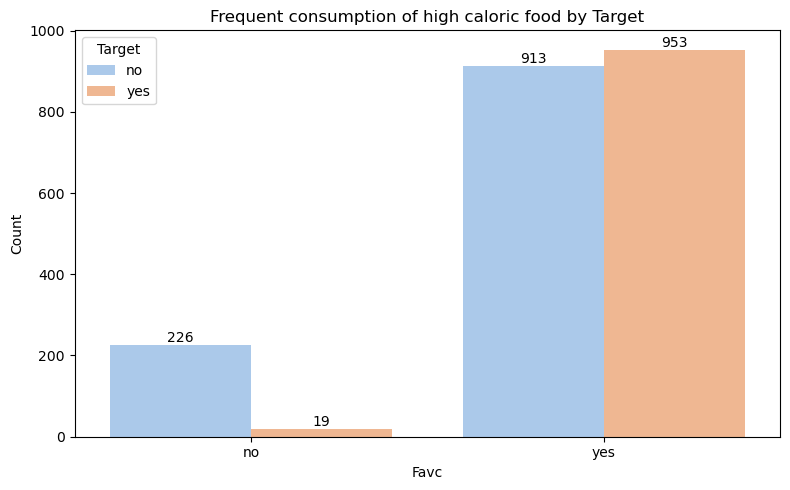

In [21]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='favc', hue='target', palette='pastel')

plt.title('Frequent consumption of high caloric food by Target')
plt.xlabel('Favc')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [22]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,no


## CAEC
#### Consumption of food between meals

In [23]:
df['caec'].isnull().sum()

0

In [24]:
df['caec'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [25]:
df['caec'].value_counts()

caec
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

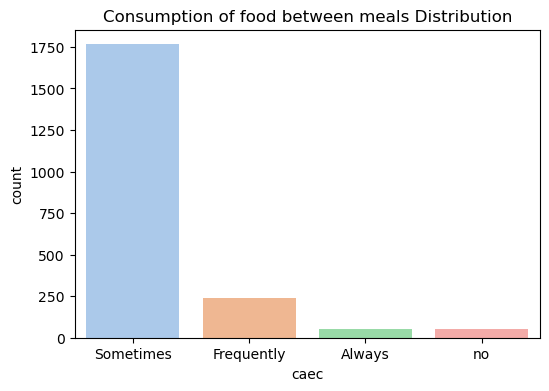

In [26]:
plt.figure( figsize=(6,4) )
plt.title('Consumption of food between meals Distribution')
sns.countplot(data=df , x='caec',palette='pastel')
plt.xlabel('caec')

plt.show()

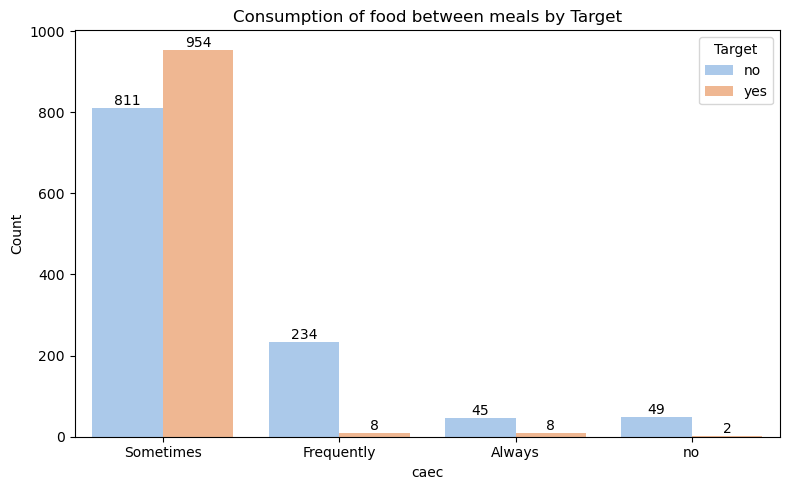

In [27]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='caec', hue='target', palette='pastel')

plt.title('Consumption of food between meals by Target')
plt.xlabel('caec')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,no


### Smoke feature

In [29]:
df['smoke'].isnull().sum()

0

In [30]:
df['smoke'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['smoke'].value_counts()

smoke
no     2067
yes      44
Name: count, dtype: int64

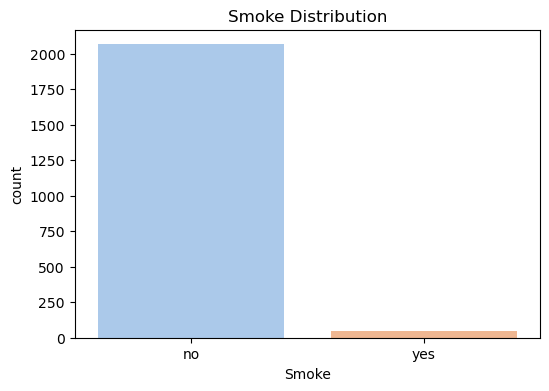

In [32]:
plt.figure( figsize=(6,4) )
plt.title('Smoke Distribution')
sns.countplot(data=df , x='smoke',palette='pastel')
plt.xlabel('Smoke')

plt.show()

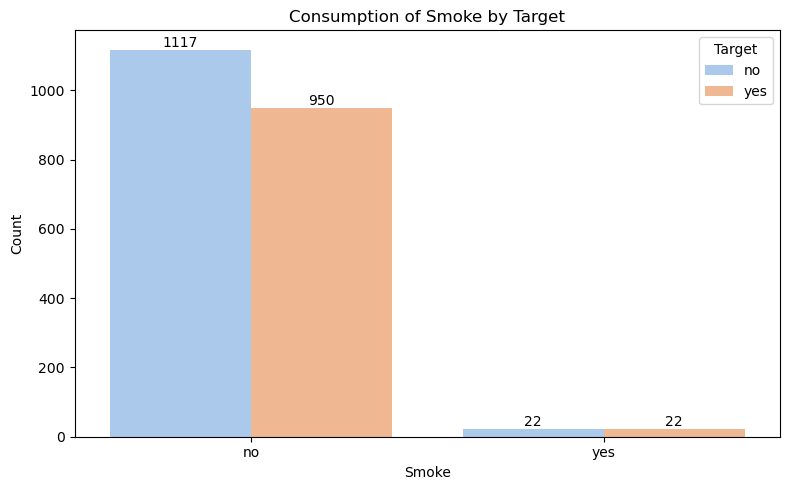

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='smoke', hue='target', palette='pastel')

plt.title('Consumption of Smoke by Target')
plt.xlabel('Smoke')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,no


### SCC
#### Calories consumption monitoring

In [35]:
df['scc'].isnull().sum()

0

In [36]:
df['scc'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
df['scc'].value_counts()

scc
no     2015
yes      96
Name: count, dtype: int64

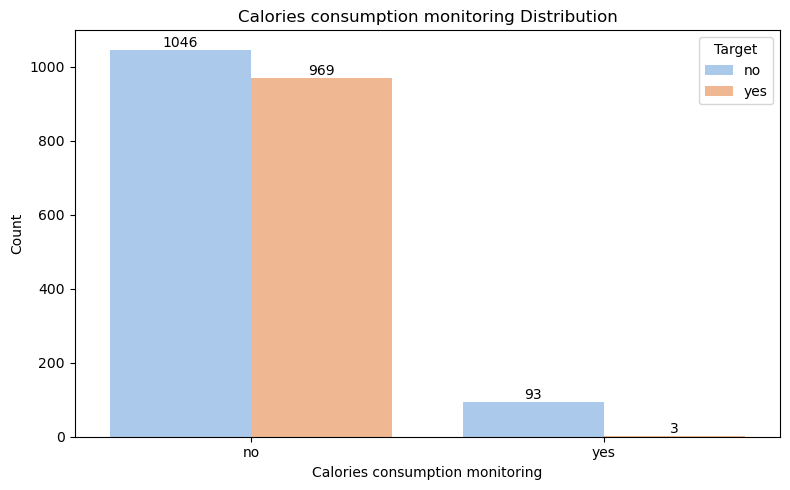

In [38]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='scc', hue='target', palette='pastel')
plt.title('Calories consumption monitoring Distribution')
plt.xlabel('Calories consumption monitoring')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


### CALC
### Consumption of alcohol

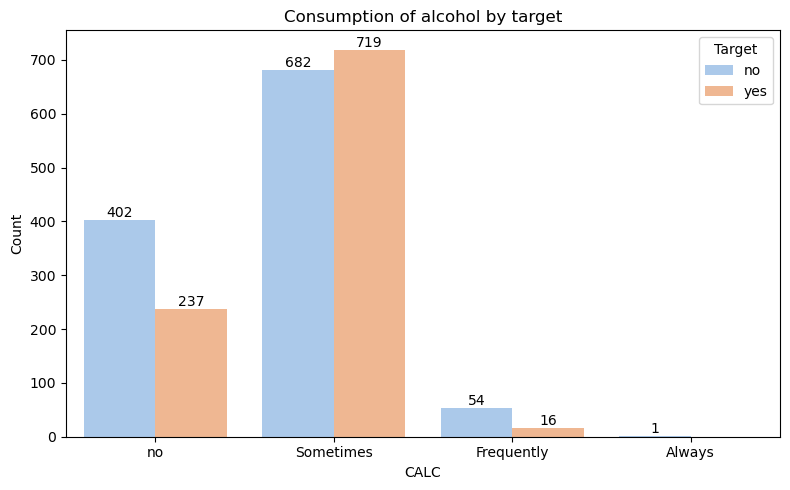

In [39]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='calc', hue='target', palette='pastel')
plt.title('Consumption of alcohol by target')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


### MTRANS
#### Transportation used

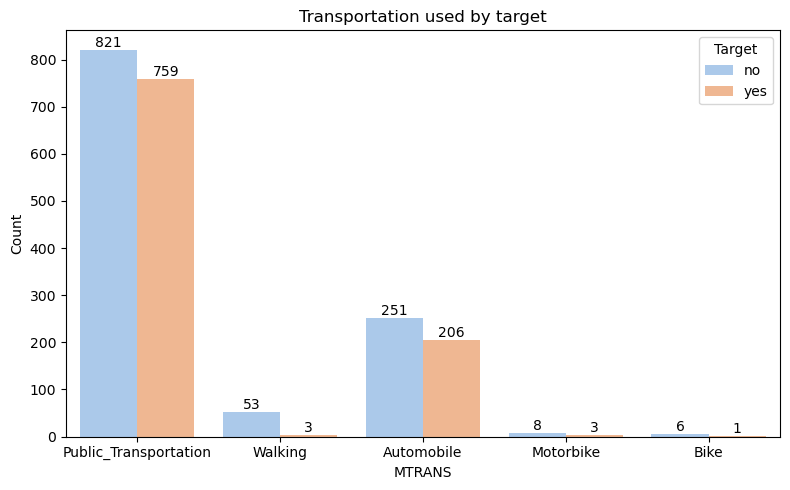

In [40]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='mtrans', hue='target', palette='pastel')
plt.title('Transportation used by target')
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.legend(title='Target')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()


### drop the columns

In [41]:
df.drop(columns=drop_cols,inplace=True)

In [42]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,no


#### seperate the dependent and independent features

In [43]:
X = df.drop(columns='target')

y= df['target']

In [44]:
cat_cols = [ col for col in X.columns if X[col].dtype == 'O' ]
num_cols = [ col for col in X.columns if X[col].dtype != 'O' ]

In [45]:
def convert_lower(value):
    value = value.strip()
    return value.lower()
    

In [46]:
for col in cat_cols:
    X[col] = X[col].apply(convert_lower)

# Explore the categorical columns

In [47]:
X[num_cols].describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


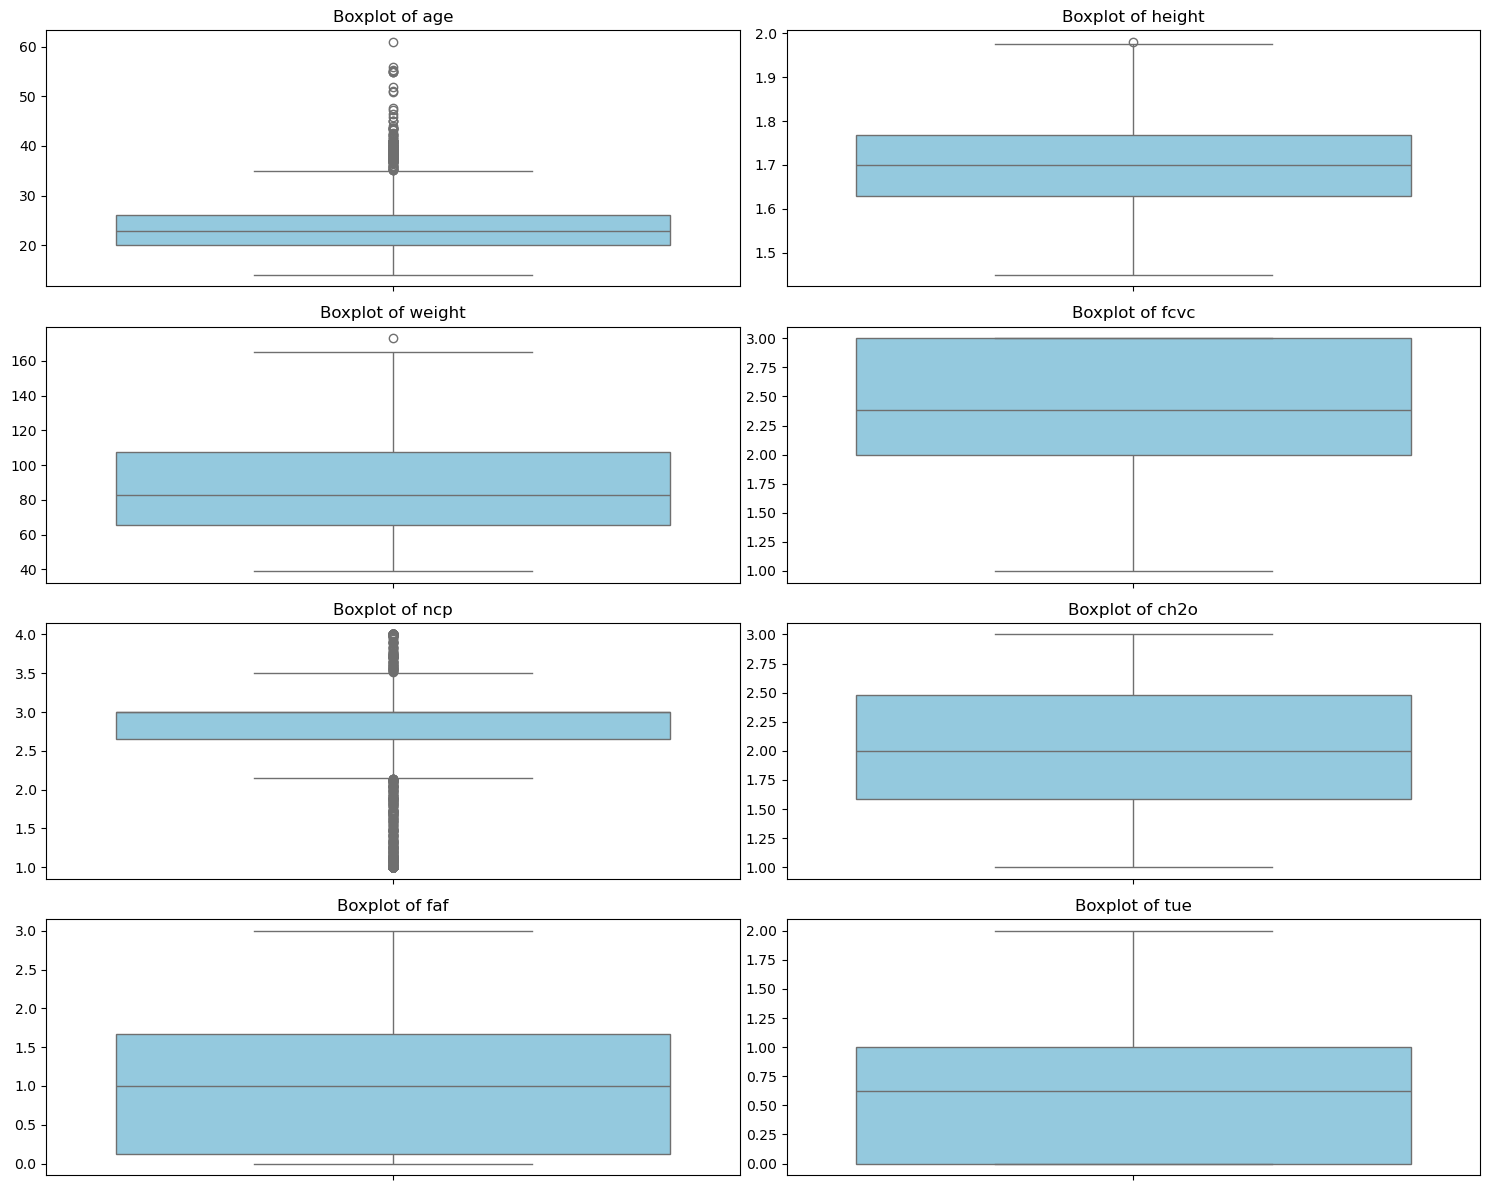

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten 2D array to 1D for easy iteration

# Plot boxplots
for i, feature in enumerate(num_cols):
    sns.boxplot(data=X, y=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

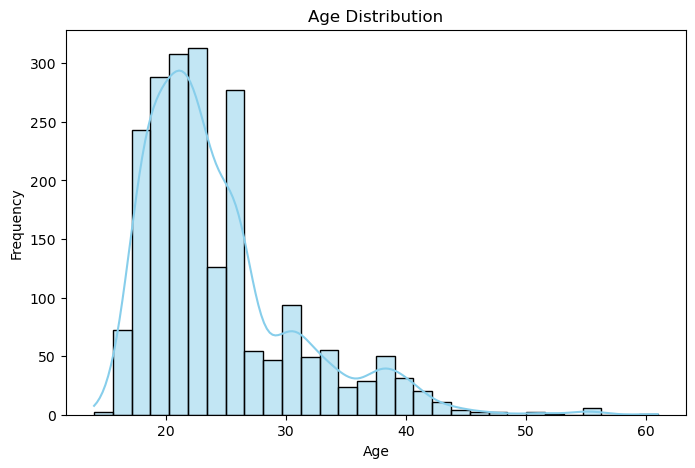

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

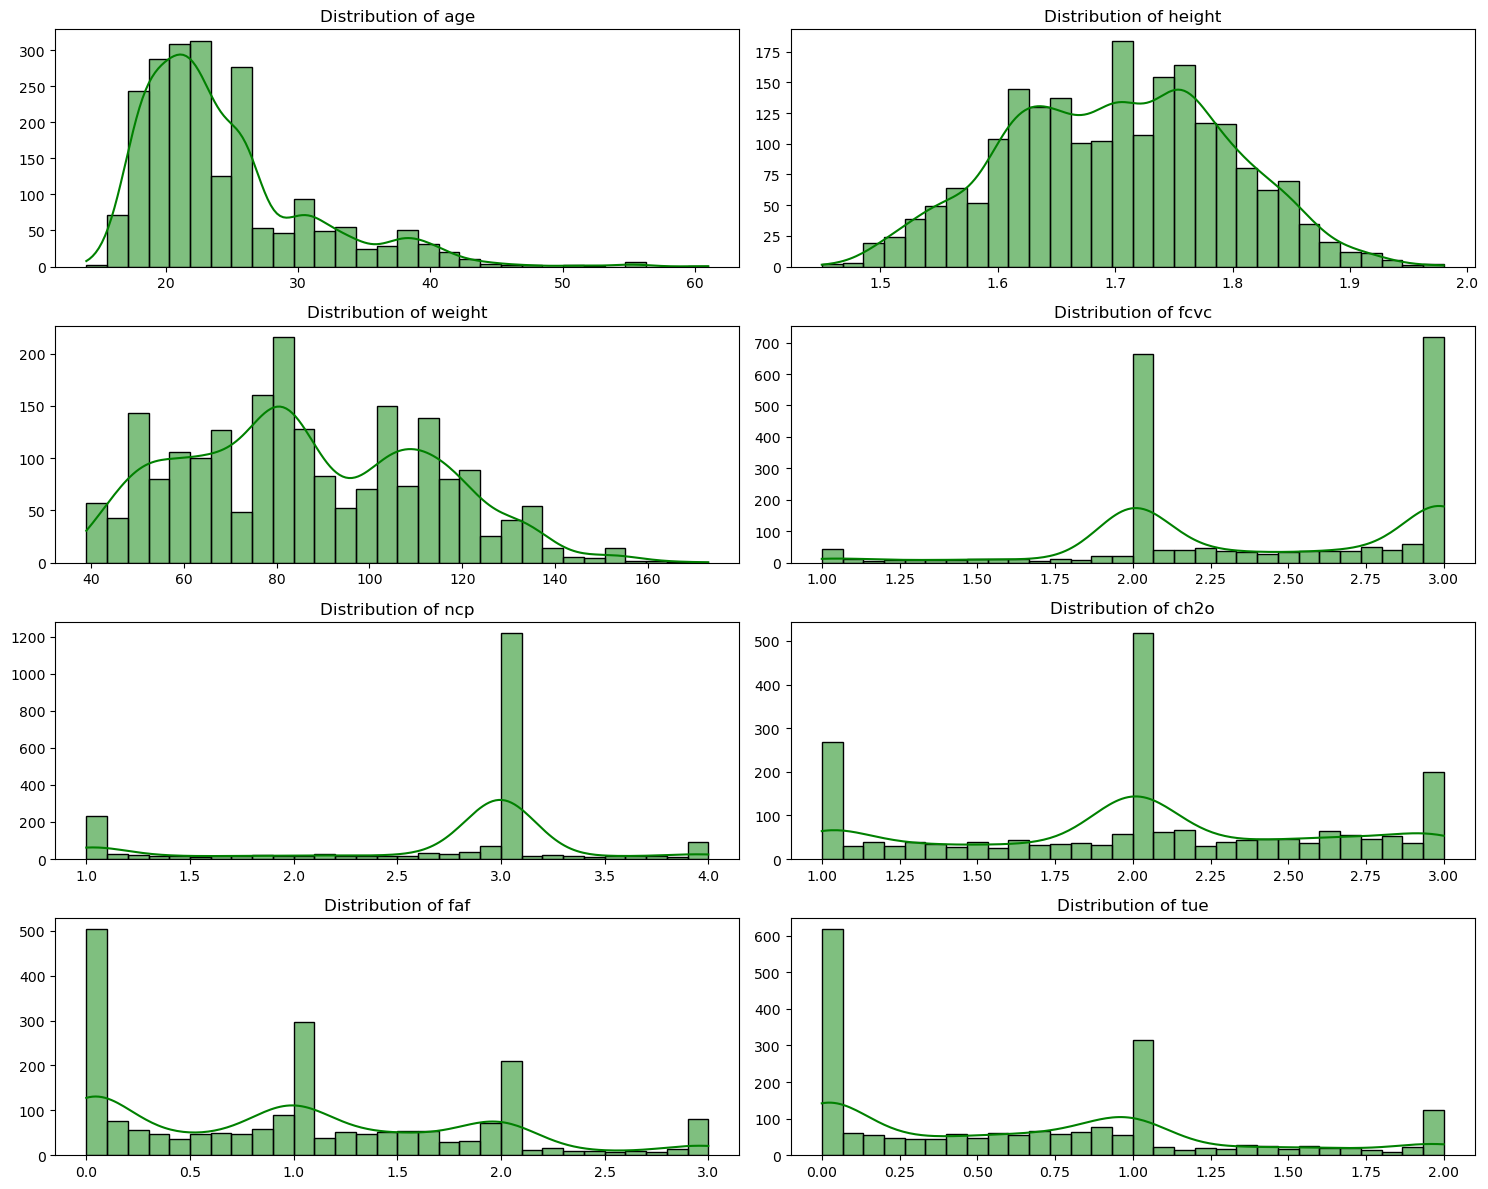

In [50]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten 2D array to 1D for easy iteration

# Plot histograms with KDE on subplots
for i, feature in enumerate(num_cols):
    sns.histplot(data=X, x=feature, bins=30, kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [51]:
X.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation
1,female,21.0,1.52,56.0,yes,no,3.0,3.0,sometimes,yes,3.0,yes,3.0,0.0,sometimes,public_transportation
2,male,23.0,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation
3,male,27.0,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking
4,male,22.0,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation


In [52]:
df['caec'].value_counts()

caec
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [53]:
df['calc'].value_counts()

calc
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [54]:
df['mtrans'].value_counts()

mtrans
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

### Split the dataset into train and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
X_train.shape , X_test.shape 

((1477, 16), (634, 16))

In [58]:
y_train.shape , y_test.shape

((1477,), (634,))

### Converting the categorical columns into numerical and scale the numerical

In [59]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder 

In [60]:
from sklearn.compose import ColumnTransformer

In [61]:
scale = StandardScaler()
ohe = OneHotEncoder( drop='first' )

In [62]:
preprocessing = ColumnTransformer(
    transformers=[
        ('encoder',ohe,cat_cols),
        ('scale',scale,num_cols)
    ],
    remainder='passthrough'
)

In [63]:
X_train_transformed = preprocessing.fit_transform( X_train )

X_test_transformed = preprocessing.transform( X_test )

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

In [67]:
svc.fit( X_train_transformed , y_train )

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predictions

In [68]:
y_train_pred = svc.predict( X_train_transformed )
y_test_pred = svc.predict( X_test_transformed ) 

### For Training

In [69]:
print( f'Training Accuracy is { accuracy_score(y_train , y_train_pred)*100 }' )
print( f'Classification report is { classification_report(y_train , y_train_pred) }' )

Training Accuracy is 99.7968855788761
Classification report is               precision    recall  f1-score   support

          no       1.00      1.00      1.00       793
         yes       1.00      1.00      1.00       684

    accuracy                           1.00      1477
   macro avg       1.00      1.00      1.00      1477
weighted avg       1.00      1.00      1.00      1477



In [70]:
confusion_matrix( y_train , y_train_pred )

array([[792,   1],
       [  2, 682]], dtype=int64)

## For testing 

In [71]:
print( f'Training Accuracy is { accuracy_score(y_test , y_test_pred)*100 }' )

print('Classification report is ')
print( f'{ classification_report(y_test , y_test_pred) }' )

Training Accuracy is 99.52681388012618
Classification report is 
              precision    recall  f1-score   support

          no       0.99      1.00      1.00       346
         yes       1.00      0.99      0.99       288

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634



In [72]:
confusion_matrix( y_test , y_test_pred )

array([[345,   1],
       [  2, 286]], dtype=int64)

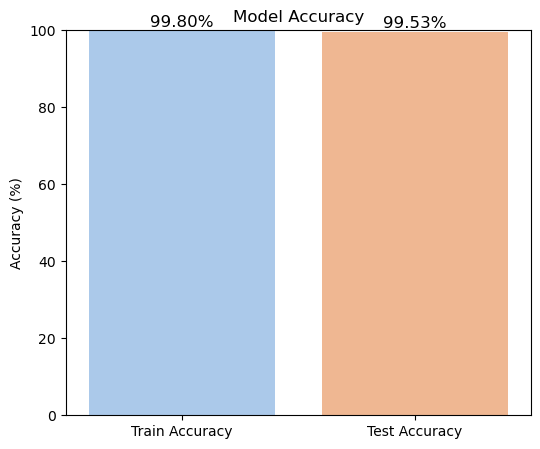

In [73]:
# Accuracy scores
data = [accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100]
labels = ['Train Accuracy', 'Test Accuracy']

# Create a bar plot
plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=data, palette='pastel')

plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

# Add data labels on top of each bar
ax = plt.gca()
for i, v in enumerate(data):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()

### save the model and preprocessor to predict the new sample

In [74]:
import joblib

In [75]:
joblib.dump( svc , './saved_models/svc.pkl' )
joblib.dump( preprocessing , './saved_models/preprocessor.pkl' )

['./saved_models/preprocessor.pkl']

### load the models

In [76]:
model = joblib.load( './saved_models/svc.pkl' )
preprocessor = joblib.load( './saved_models/preprocessor.pkl' )

In [77]:
df.head(1)

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,no


In [78]:
newsample = {
    'gender':'Female',
    'age':21.0,
    'height':1.62,
    'weight':64.0,
    'family_history_with_overweight':'yes',
    'favc':'no',
    'fcvc':2.0,
    'ncp':3.0,
    'caec':'Sometimes',
    'smoke':'no',
    'ch2o':2.0,
    'scc':'no',
    'faf':0.0,
    'tue':1.0,
    'calc':'no',
    'mtrans':'Public_Transportation'
}

In [79]:
newData = pd.DataFrame( data=[newsample] )
newData

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation


In [80]:
for col in cat_cols:
    newData[col] = newData[col].apply(convert_lower)

In [83]:
newData

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation


In [81]:
temp = preprocessor.transform( newData )

In [82]:
model.predict( temp )[0]

'no'